In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [116]:
temp = pd.read_csv('GlobalTemperatures.csv')
maunaloa = pd.read_csv('maunaloa.csv')

In [117]:
co2_7923 = pd.read_csv('co2_1979_2023.csv')

In [118]:
temp.columns.values

array(['dt', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'], dtype=object)

In [119]:
maunaloa.columns.values

array(['Unnamed: 0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Average'], dtype=object)

In [120]:
co2_7923.columns

Index(['year', 'mean', 'unc'], dtype='object')

In [121]:
temp = temp[['dt', 'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']]

In [122]:
temp.columns

Index(['dt', 'LandAverageTemperature', 'LandMaxTemperature',
       'LandMinTemperature', 'LandAndOceanAverageTemperature'],
      dtype='object')

In [123]:
temp.shape

(3192, 5)

In [124]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "year", 0)

In [125]:
temp.insert(temp.columns.get_loc("LandAverageTemperature"), "month", 0)

In [126]:
temp.head(5)

,dt,year,month,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,0,0,3.034,NaN,NaN,NaN
1,1750-02-01,0,0,3.083,NaN,NaN,NaN
2,1750-03-01,0,0,5.626,NaN,NaN,NaN
3,1750-04-01,0,0,8.490,NaN,NaN,NaN
4,1750-05-01,0,0,11.573,NaN,NaN,NaN


In [127]:
temp.loc[0, 'dt'][:4]

'1750'

In [128]:
temp.loc[0, 'dt'][5:7]

'01'

In [129]:
temp.year = temp.dt.map(lambda x: int(x[:4]))

In [130]:
temp.year.values

array([1750, 1750, 1750, ..., 2015, 2015, 2015], dtype=int64)

In [131]:
temp.month = temp.dt.map(lambda x: int(x[5:7]))

In [132]:
yearly_temp = pd.DataFrame(index=range(len(temp.year.unique())), columns = ['year','land','landmax','landmin','landocean'])

In [133]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN


In [134]:
yearly_temp.year=temp.year.unique()

In [135]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,2011,NaN,NaN,NaN,NaN
262,2012,NaN,NaN,NaN,NaN
263,2013,NaN,NaN,NaN,NaN
264,2014,NaN,NaN,NaN,NaN
265,2015,NaN,NaN,NaN,NaN


In [136]:
yearly_temp.land=temp.groupby('year').LandAverageTemperature.mean().values
yearly_temp.landmax=temp.groupby('year').LandMaxTemperature.mean().values
yearly_temp.landmin=temp.groupby('year').LandMinTemperature.mean().values
yearly_temp.landocean=temp.groupby('year').LandAndOceanAverageTemperature.mean().values

#should also try groupby.apply on a slice

In [137]:
yearly_temp.tail(5)

,year,land,landmax,landmin,landocean
261,2011,9.516000,15.284833,3.827667,15.769500
262,2012,9.507333,15.332833,3.756167,15.802333
263,2013,9.606500,15.373833,3.911333,15.854417
264,2014,9.570667,15.313583,3.877750,15.913000
265,2015,9.831000,15.572667,4.148833,16.058583


In [138]:
 maunaloa.rename(columns = {maunaloa.columns[0] : 'year'}, inplace = True)

In [139]:
maunaloa.columns

Index(['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Average'],
      dtype='object')

In [140]:
maunaloa.loc[0, 'Average'] = maunaloa.loc[0, 'Mar':'Dec'].mean()

In [141]:
maunaloa.Average[0]

315.234

In [142]:
co2temp = yearly_temp

In [143]:
co2temp['co2'] = 0
co2temp['co2_maunaloa'] = 0
co2temp['co2_7923'] = 0
co2temp.head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
0,1750,8.719364,NaN,NaN,NaN,0,0,0


In [144]:
co2temp[co2temp.year==1958]

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
208,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [145]:
co2temp.drop(co2temp.index[:208]).head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
208,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [146]:
co2temp = co2temp.drop(co2temp.index[:208])

In [147]:
co2temp = co2temp.set_index('year', drop=False)
co2temp.head(1)

,year,land,landmax,landmin,landocean,co2,co2_maunaloa,co2_7923
year,,,,,,,,
1958,1958,8.77375,14.4775,3.1145,15.382083,0,0,0


In [150]:
co2temp.loc[:2008, 'co2_maunaloa'] = maunaloa.Average.values

In [151]:
co2temp.loc[1979:, 'co2_7923'] = co2_7923.loc[:36,'mean'].values

In [153]:
co2temp.loc[co2temp.co2_maunaloa==0, 'co2'] = co2temp.loc[co2temp.co2_maunaloa==0, 'co2_7923']

In [154]:
co2temp.loc[co2temp.co2==0, 'co2'] = co2temp.loc[co2temp.co2==0, 'co2_maunaloa']

In [155]:
co2temp = co2temp.drop(columns = ['co2_maunaloa', 'co2_7923'])

In [156]:
maunaloa.loc[maunaloa.year==1964]

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
6,1964,319.57,-99.99,-99.99,-99.99,322.24,321.89,320.44,318.7,316.7,316.79,317.79,318.71,-99.99


In [157]:
co2temp.loc[1964, 'co2'] = maunaloa.loc[6, ['Jan', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean()

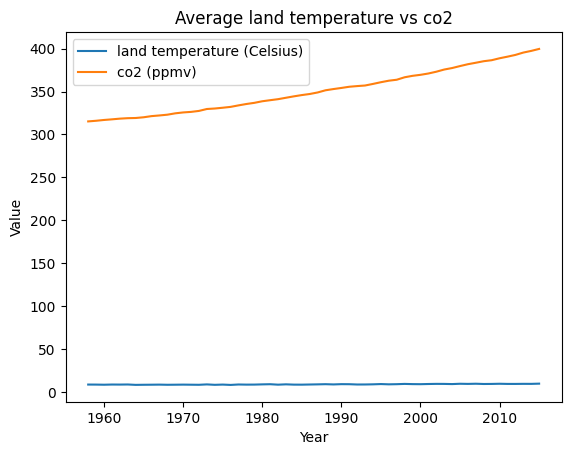

In [170]:
plt.plot(co2temp['year'], co2temp['land'], label='land temperature (Celsius)')
plt.plot(co2temp['year'], co2temp['co2'], label='co2 (ppmv)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average land temperature vs co2')
plt.legend()

plt.show()

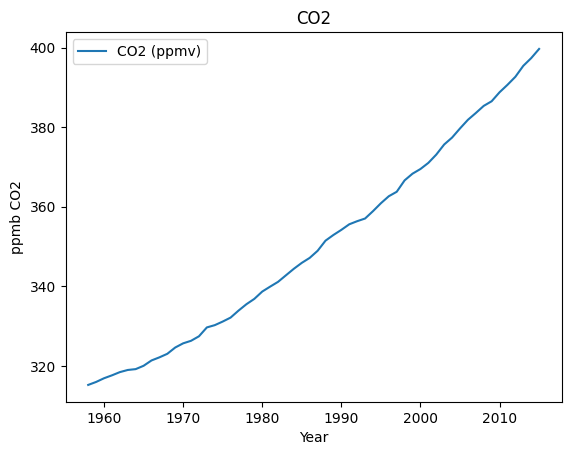

In [176]:
plt.plot(co2temp['year'], co2temp['co2'], label='CO2 (ppmv)')
plt.xlabel('Year')
plt.ylabel('ppmb CO2')
plt.title('CO2')
plt.legend()

plt.show()

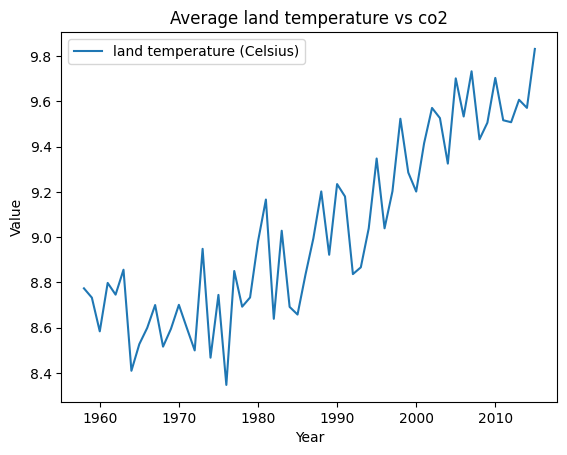

In [171]:
plt.plot(co2temp['year'], co2temp['land'], label='land temperature (Celsius)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average land temperature vs co2')
plt.legend()

plt.show()

In [179]:
import statsmodels.formula.api as smf

In [181]:
mod = smf.ols('land ~ co2', data=co2temp)
res = mod.fit()

mod_with_robust_errors = res.get_robustcov_results(cov_type='HC1', use_t=None)
print(mod_with_robust_errors.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     310.2
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.68e-24
Time:                        15:56:30   Log-Likelihood:                 20.109
No. Observations:                  58   AIC:                            -36.22
Df Residuals:                      56   BIC:                            -32.10
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0159      0.291     13.808      0.0

In [182]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   land   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     248.3
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.05e-22
Time:                        15:56:45   Log-Likelihood:                 20.109
No. Observations:                  58   AIC:                            -36.22
Df Residuals:                      56   BIC:                            -32.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0159      0.319     12.587      0.0